In [ ]:
import sys

assert sys.version_info >= (3, 7)
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
import numpy as np
import pandas as pd

# **Récupération des données**

In [ ]:
from pathlib import Path
def load_weather_data():
    csv_path = Path('/content/drive/MyDrive/weatherAUS.csv')
    return pd.read_csv(csv_path,)
weather_data=load_weather_data()


# **Take a Quick Look at the Data Structure**

In [ ]:
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
weather_data["Date"].value_counts()

,count
Date,
2017-06-24,49
2017-06-23,49
2017-06-22,49
2017-06-21,49
2017-06-20,49
...,...
2008-01-27,1
2008-01-28,1
2008-01-29,1


In [ ]:
weather_data["Location"].value_counts()

,count
Location,
Canberra,3436
Sydney,3344
Adelaide,3193
Darwin,3193
Hobart,3193
Perth,3193
Melbourne,3193
Brisbane,3193
Albury,3040


In [ ]:
weather_data["RainToday"].value_counts()

,count
RainToday,
No,110319
Yes,31880


In [ ]:
weather_data["WindGustDir"].value_counts()

,count
WindGustDir,
W,9915
SE,9418
N,9313
SSE,9216
E,9181
S,9168
WSW,9069
SW,8967
SSW,8736


array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

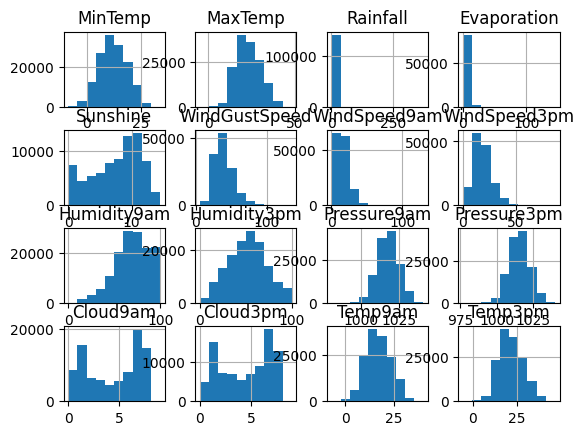

In [ ]:
import matplotlib.pyplot as plt

weather_data.hist()


# **Create a test Set**

In [ ]:
np.random.seed(42)

In [ ]:
weather_clean = weather_data.dropna(subset=["RainTomorrow"])

In [ ]:
weather_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

In [ ]:
from sklearn.model_selection import train_test_split

# Split train+test / test (80% / 20%)
temp_set, test_set = train_test_split(
    weather_clean,
    test_size=0.2,
    stratify=weather_clean["RainTomorrow"],  # stratification sur la cible
    random_state=42
)


# Split train / validation (80% / 20%)
train_set, valid_set = train_test_split(
    temp_set,
    test_size=0.2,
    stratify=temp_set["RainTomorrow"],  # stratification sur la cible
    random_state=42
)

# Vérification
print("Train:", train_set["RainTomorrow"].value_counts(normalize=True))
print("Validation:", valid_set["RainTomorrow"].value_counts(normalize=True))
print("Test:", test_set["RainTomorrow"].value_counts(normalize=True))


Train: RainTomorrow
No     0.77581
Yes    0.22419
Name: proportion, dtype: float64
Validation: RainTomorrow
No     0.775834
Yes    0.224166
Name: proportion, dtype: float64
Test: RainTomorrow
No     0.775836
Yes    0.224164
Name: proportion, dtype: float64


# **Discover and Visualize the Data to Gain Insights**

**Prepare the Data for Machine Learning Algorithms**

In [ ]:
weather = train_set.drop("RainTomorrow", axis=1)
weather_labels = train_set["RainTomorrow"].copy()



In [ ]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
63812,2016-06-12,Sale,4.5,14.1,2.6,...,8.0,4.0,8.5,13.1,Yes
92712,2015-12-06,GoldCoast,18.0,28.2,0.0,...,NaN,NaN,26.6,26.5,No
81636,2010-10-01,Dartmoor,3.4,17.1,0.2,...,NaN,NaN,8.3,16.2,No
136024,2017-05-10,Launceston,1.1,16.7,0.0,...,8.0,NaN,4.9,16.4,No
104192,2013-09-25,Nuriootpa,12.2,21.7,0.0,...,4.0,5.0,17.2,20.3,No


**Data Cleaning**

In [ ]:
null_rows_idx = weather.isnull().any(axis=1)
weather.loc[null_rows_idx].isnull().sum()

,0
Date,0
Location,0
MinTemp,404
MaxTemp,198
Rainfall,891
Evaporation,38881
Sunshine,43357
WindGustDir,5968
WindGustSpeed,5932
WindDir9am,6410


# **data processing pipline**

In [ ]:
weather = train_set.drop("RainTomorrow", axis=1)
weather_labels = train_set["RainTomorrow"].copy()

In [ ]:

weather["Date"] = pd.to_datetime(weather["Date"], errors='coerce')
weather["Month"] = weather["Date"].dt.month
weather["Day"] = weather["Date"].dt.day
weather["DayOfYear"] = weather["Date"].dt.dayofyear
weather = weather.drop("Date", axis=1)

num_cols = weather.select_dtypes(include=["float64", "int64"]).columns.tolist()
cat_cols = weather.select_dtypes(include=["object"]).columns.tolist()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

**Looking for Correlations**

In [ ]:
# @title
X_train= train_set.drop("RainTomorrow", axis=1)
y_train= train_set["RainTomorrow"].copy()


X_train["Date"] = pd.to_datetime(X_train["Date"], errors='coerce')
X_train["Month"] = X_train["Date"].dt.month
X_train["Day"] = X_train["Date"].dt.day
X_train["DayOfYear"] = X_train["Date"].dt.dayofyear
X_train= X_train.drop("Date", axis=1)  # on supprime la colonne Date originale

X_train_preprocessed = preprocessor.fit_transform(X_train)

import numpy as np
import pandas as pd

# Colonnes numériques
num_features = num_cols

# Colonnes catégorielles après one-hot
cat_features = preprocessor.named_transformers_["cat"]\
    .named_steps["onehot"].get_feature_names_out(cat_cols)

# Toutes les colonnes
all_features = np.concatenate([num_features, cat_features])

# Créer DataFrame
X_train_preprocessed_df = pd.DataFrame(
    X_train_preprocessed.toarray() if hasattr(X_train_preprocessed, "toarray") else X_train_preprocessed,
    columns=all_features
)

# Ajouter la cible pour corrélation
X_train_preprocessed_df["RainTomorrow"] = y_train.map({"Yes": 1, "No": 0})


corr_with_target = X_train_preprocessed_df.corr()["RainTomorrow"].sort_values(ascending=False)
print(corr_with_target[:20])

X_train_preprocessed_df.info()


RainTomorrow         1.000000
WindGustDir_NNW      0.012264
Location_Bendigo     0.011043
Location_Penrith     0.008196
Location_Cobar       0.007467
Location_Brisbane    0.007435
Location_Adelaide    0.006432
WindDir3pm_E         0.006413
WindDir3pm_N         0.006302
Location_Sydney      0.006114
Location_Dartmoor    0.005857
WindDir9am_SE        0.005768
WindGustDir_ENE      0.004523
Location_Cairns      0.004410
WindGustDir_S        0.004099
Temp3pm              0.004076
WindDir9am_ESE       0.003941
WindDir3pm_ESE       0.003868
Evaporation          0.003849
WindDir9am_SSE       0.003714
Name: RainTomorrow, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91003 entries, 0 to 91002
Columns: 116 entries, MinTemp to RainTomorrow
dtypes: float64(116)
memory usage: 80.5 MB


# **Training a Binary Classifier**

**SGDclassifier**

In [ ]:
from sklearn.linear_model import SGDClassifier


full_pipeline = Pipeline([
    ("preprocessing", preprocessor ),
    ("model", SGDClassifier(random_state=42, class_weight="balanced"))
])
weather_labels_binary = weather_labels.map({"Yes": 1, "No": 0})

full_pipeline.fit(weather, weather_labels_binary)







Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am', 'WindDir3pm',
                                                   'RainToday'])])),
                ('model',
                 SGDClassifier(class_weight='balanced', random_state=42))])

In [ ]:
weather_pred = full_pipeline.predict(weather)

print(weather_pred[:10])
print(weather_labels_binary[:10])

[0 0 0 0 1 0 1 0 0 0]
63812     0
92712     0
81636     0
136024    0
104192    1
42173     1
69275     1
59339     0
142436    0
51187     0
Name: RainTomorrow, dtype: int64


**SVM classifier**

In [ ]:
from sklearn.svm import SVC
svm_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", SVC(kernel="rbf", C=1.0, gamma='scale',class_weight="balanced" ,  random_state=42))
])

svm_pipeline.fit(weather, weather_labels_binary)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am', 'WindDir3pm',
                                                   'RainToday'])])),
                ('model', SVC(class_weight='balanced', random_state=42))])

In [ ]:
weather_pred_svm = svm_pipeline.predict(weather)

print(weather_pred_svm[:10])
print(weather_labels_binary[:10])

[0 0 0 0 1 1 0 0 0 0]
63812     0
92712     0
81636     0
136024    0
104192    1
42173     1
69275     1
59339     0
142436    0
51187     0
Name: RainTomorrow, dtype: int64


# **Performance Measures**

## **Measuring Accuracy Using Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#dummyclassifier
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(weather , weather_labels_binary)
print(any(dummy_clf.predict(weather)))

False


In [ ]:
cross_val_score(dummy_clf, weather , weather_labels_binary, cv=3, scoring="accuracy")

array([0.77580353, 0.7758291 , 0.77579614])

In [ ]:
#SGD Classifier
from sklearn.model_selection import cross_val_score

cross_val_score(full_pipeline, weather , weather_labels_binary, cv=3, scoring="accuracy")

array([0.79426405, 0.78558713, 0.77879607])

In [ ]:
#SVM classifier
from sklearn.model_selection import cross_val_score

cross_val_score(svm_pipeline, weather , weather_labels_binary, cv=3, scoring="accuracy")

array([0.81832866, 0.81776225, 0.81548757])

**Confusion Matrix**

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#sgdclassif
weather_pred_sgd = cross_val_predict(full_pipeline, weather , weather_labels_binary, cv=3)
cm = confusion_matrix(weather_labels_binary, weather_pred_sgd)
cm

array([[55541, 15060],
       [ 4395, 16007]])

In [ ]:
#svm
weather_pred_svm = cross_val_predict(svm_pipeline, weather , weather_labels_binary, cv=3)
cm = confusion_matrix(weather_labels_binary, weather_pred_svm)
cm

array([[58273, 12328],
       [ 4308, 16094]])

In [ ]:
#dummy
weather_pred_dummy = cross_val_predict(dummy_clf, weather , weather_labels_binary, cv=3)
cm = confusion_matrix(weather_labels_binary, weather_pred_dummy)
cm

array([[70601,     0],
       [20402,     0]])

**Precision and Recall**

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score

#sgd
print(precision_score(weather_labels_binary, weather_pred_sgd ))
print(recall_score(weather_labels_binary, weather_pred_sgd ))
print(f1_score(weather_labels_binary, weather_pred_sgd ))

0.5152412527762578
0.7845799431428291
0.62200547902621


In [ ]:
#svm
print(precision_score(weather_labels_binary, weather_pred_svm))
print(recall_score(weather_labels_binary, weather_pred_svm))
print(f1_score(weather_labels_binary, weather_pred_svm))


0.5662514953205263
0.7888442309577492
0.6592659347861707


# **Precision/Recall Trade-off**

In [ ]:
#SVM
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(svm_pipeline, weather , weather_labels_binary, cv=3,method="decision_function")


In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(weather_labels_binary, y_scores)

Meilleur seuil : 0.313
F1-score max : 0.671
Precision : 0.631
Recall : 0.717


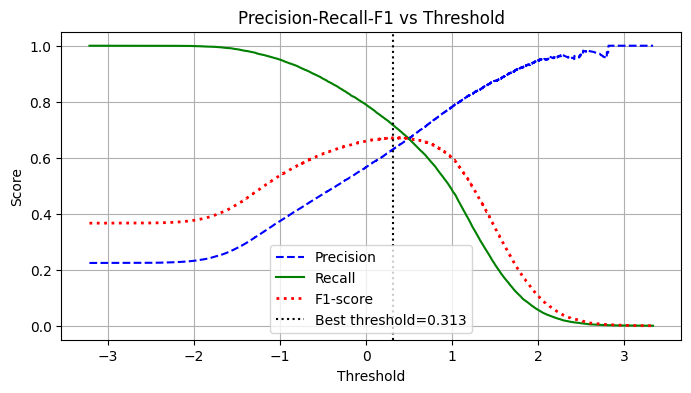

In [ ]:
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])

# 4. Trouver le meilleur seuil (F1 maximum)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
best_precision = precisions[best_idx]
best_recall = recalls[best_idx]

print(f"Meilleur seuil : {best_threshold:.3f}")
print(f"F1-score max : {best_f1:.3f}")
print(f"Precision : {best_precision:.3f}")
print(f"Recall : {best_recall:.3f}")

# 5. Tracer la courbe
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores, 'r:', label='F1-score', linewidth=2)
plt.axvline(best_threshold, color='black', linestyle=':', label=f'Best threshold={best_threshold:.3f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall-F1 vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

# 6. Utiliser le meilleur seuil pour prédire
y_pred_optimal = (y_scores >= best_threshold).astype(int)

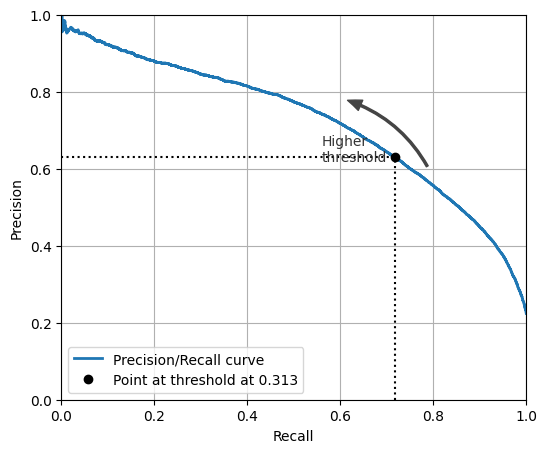

In [ ]:
import matplotlib.patches as patches  # extra code – for the curved arrow

idx = (thresholds >= best_threshold).argmax()
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold at 0.313")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [ ]:

idx_for_80_recall = (recalls >= 0.80).argmax()
threshold_for_80_recall = thresholds[idx_for_80_recall]
threshold_for_80_recall

np.float64(-3.2159811570422243)

In [ ]:
y_train_pred_80 = (y_scores >= threshold_for_80_recall)
precision_score(weather_labels_binary, y_train_pred_80)


0.22419041130512182

In [ ]:
recall_score(weather_labels_binary, y_train_pred_80)

1.0

# **The ROC Curve**

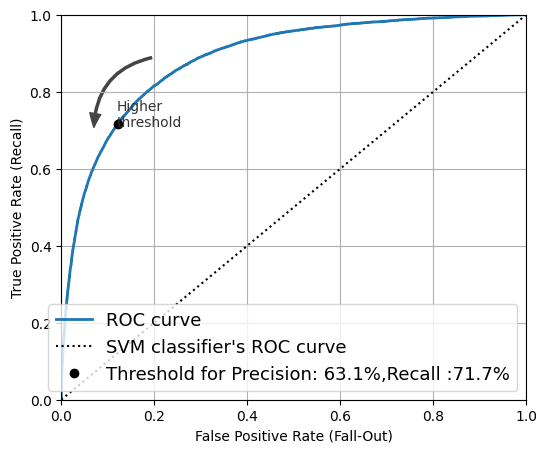

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(weather_labels_binary, y_scores)

idx_for_threshold = (thresholds <=best_threshold).argmax()
tpr_80, fpr_80 = tpr[idx_for_threshold], fpr[idx_for_threshold]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="SVM classifier's ROC curve")
plt.plot([fpr_80], [tpr_80], "ko", label="Threshold for Precision: 63.1%,Recall :71.7%")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(weather_labels_binary, y_scores)

np.float64(0.8883417244352663)

# **Tester le modèle SVM sur validation set**


Métriques sur VALIDATION:
  • Accuracy:  0.8393 (83.93%)
  • Precision: 0.6231 (62.31%)
  • Recall:    0.7167 (71.67%)
  • F1-Score:  0.6666 (66.66%)

Matrice de confusion:
  TN: 15440  |  FP:  2211
  FN:  1445  |  TP:  3655

📊 AVEC SEUIL OPTIMAL (0.313):

                Train      Validation    Différence
  Precision:    0.6309     0.6231        +0.0078
  Recall:       0.7167     0.7167        +0.0001
  F1-Score:     0.6711     0.6666        +0.0045

 VISUALISATION DES MATRICES DE CONFUSION


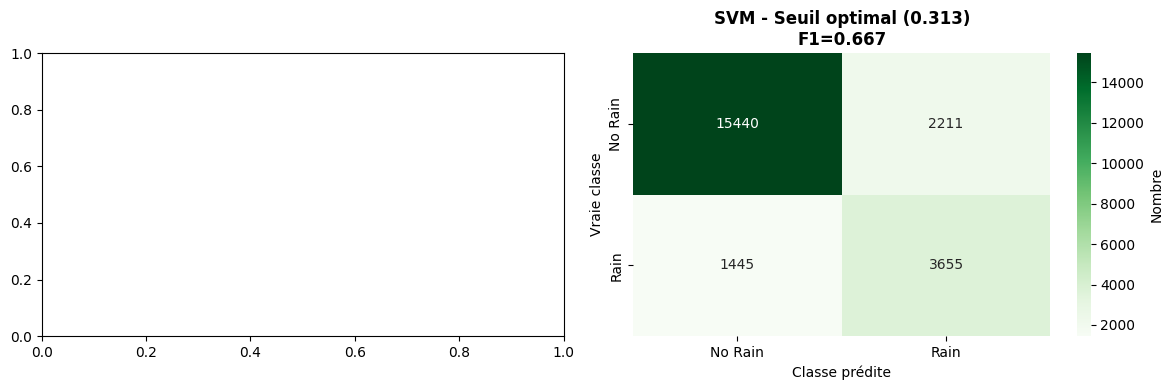

OPTIMISATION DU SEUIL SUR VALIDATION

🎯 SEUIL OPTIMAL SUR TRAIN: 0.313
   → F1: 0.671, Precision: 0.631, Recall: 0.717

🎯 SEUIL OPTIMAL SUR VALIDATION: 0.347
   → F1: 0.668, Precision: 0.632, Recall: 0.709

📊 Différence de seuils: 0.034


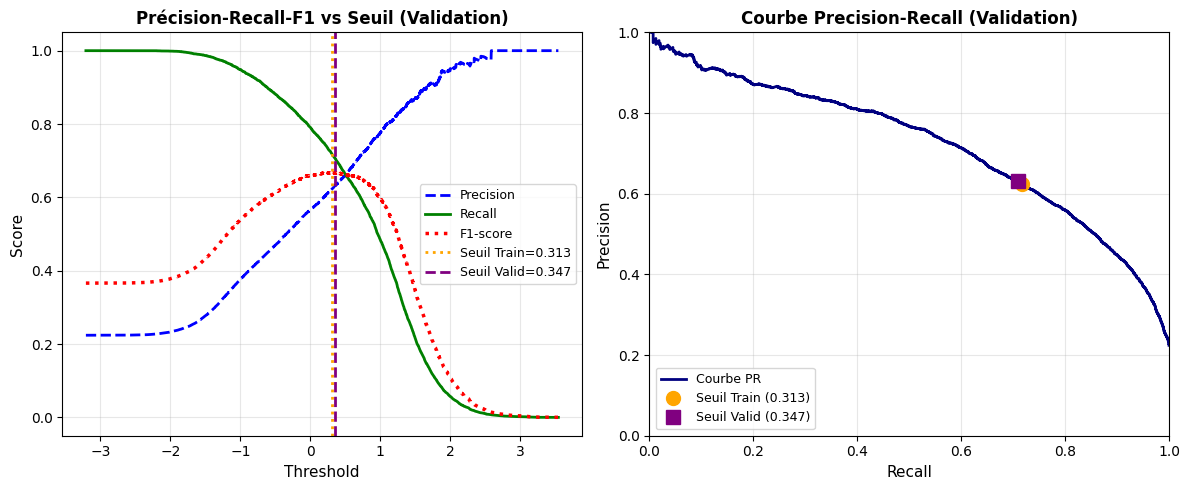


ANALYSE ROC-AUC SUR VALIDATION

📈 AUC-ROC sur VALIDATION: 0.8874


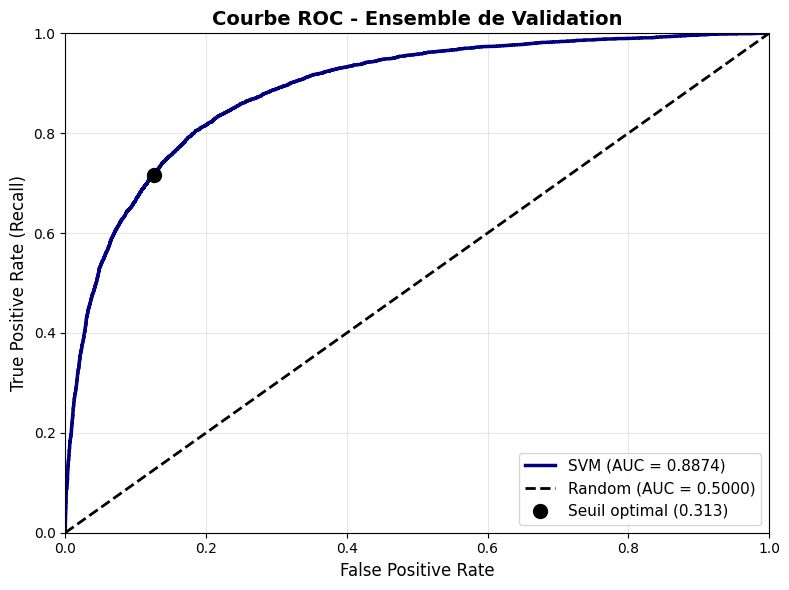


RÉSUMÉ DES PERFORMANCES DU SVM

   Avec seuil optimal du train (0.313):
   • F1-Score:  0.6666
   • Precision: 0.6231
   • Recall:    0.7167
   • AUC-ROC:   0.8874


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns


# Séparer features et target pour validation
X_valid = valid_set.drop("RainTomorrow", axis=1)
y_valid = valid_set["RainTomorrow"].copy()

# Appliquer les mêmes transformations temporelles que sur train
X_valid["Date"] = pd.to_datetime(X_valid["Date"], errors='coerce')
X_valid["Month"] = X_valid["Date"].dt.month
X_valid["Day"] = X_valid["Date"].dt.day
X_valid["DayOfYear"] = X_valid["Date"].dt.dayofyear
X_valid = X_valid.drop("Date", axis=1)

# Convertir la cible en binaire
y_valid_binary = y_valid.map({"Yes": 1, "No": 0})

# Scores de décision (pour optimiser le seuil)
y_scores_valid = svm_pipeline.decision_function(X_valid)

# Prédictions avec le seuil optimal trouvé sur train
y_pred_svm_optimal = (y_scores_valid >= best_threshold).astype(int)


acc_optimal = accuracy_score(y_valid_binary, y_pred_svm_optimal)
prec_optimal = precision_score(y_valid_binary, y_pred_svm_optimal)
rec_optimal = recall_score(y_valid_binary, y_pred_svm_optimal)
f1_optimal = f1_score(y_valid_binary, y_pred_svm_optimal)

print(f"\nMétriques sur VALIDATION:")
print(f"  • Accuracy:  {acc_optimal:.4f} ({acc_optimal*100:.2f}%)")
print(f"  • Precision: {prec_optimal:.4f} ({prec_optimal*100:.2f}%)")
print(f"  • Recall:    {rec_optimal:.4f} ({rec_optimal*100:.2f}%)")
print(f"  • F1-Score:  {f1_optimal:.4f} ({f1_optimal*100:.2f}%)")

# Matrice de confusion
cm_optimal = confusion_matrix(y_valid_binary, y_pred_svm_optimal)
print(f"\nMatrice de confusion:")
print(f"  TN: {cm_optimal[0,0]:5d}  |  FP: {cm_optimal[0,1]:5d}")
print(f"  FN: {cm_optimal[1,0]:5d}  |  TP: {cm_optimal[1,1]:5d}")



print(f"\n📊 AVEC SEUIL OPTIMAL ({best_threshold:.3f}):")
print(f"\n                Train      Validation    Différence")
print(f"  Precision:    {best_precision:.4f}     {prec_optimal:.4f}        {best_precision-prec_optimal:+.4f}")
print(f"  Recall:       {best_recall:.4f}     {rec_optimal:.4f}        {best_recall-rec_optimal:+.4f}")
print(f"  F1-Score:     {best_f1:.4f}     {f1_optimal:.4f}        {best_f1-f1_optimal:+.4f}")


print("\n" + "="*70)
print(" VISUALISATION DES MATRICES DE CONFUSION")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))



# Seuil optimal
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Rain', 'Rain'],
            yticklabels=['No Rain', 'Rain'],
            ax=axes[1], cbar_kws={'label': 'Nombre'})
axes[1].set_title(f'SVM - Seuil optimal ({best_threshold:.3f})\nF1={f1_optimal:.3f}', fontweight='bold')
axes[1].set_ylabel('Vraie classe')
axes[1].set_xlabel('Classe prédite')

plt.tight_layout()
plt.show()


print("="*70)
print("OPTIMISATION DU SEUIL SUR VALIDATION")
print("="*70)

# Calculer precision-recall pour tous les seuils
precisions_val, recalls_val, thresholds_val = precision_recall_curve(
    y_valid_binary, y_scores_valid
)

# Calculer F1 pour chaque seuil
f1_scores_val = 2 * (precisions_val[:-1] * recalls_val[:-1]) / \
                (precisions_val[:-1] + recalls_val[:-1] + 1e-10)

# Trouver le meilleur seuil sur validation
best_idx_val = np.argmax(f1_scores_val)
best_threshold_val = thresholds_val[best_idx_val]
best_f1_val = f1_scores_val[best_idx_val]
best_precision_val = precisions_val[best_idx_val]
best_recall_val = recalls_val[best_idx_val]

print(f"\n🎯 SEUIL OPTIMAL SUR TRAIN: {best_threshold:.3f}")
print(f"   → F1: {best_f1:.3f}, Precision: {best_precision:.3f}, Recall: {best_recall:.3f}")

print(f"\n🎯 SEUIL OPTIMAL SUR VALIDATION: {best_threshold_val:.3f}")
print(f"   → F1: {best_f1_val:.3f}, Precision: {best_precision_val:.3f}, Recall: {best_recall_val:.3f}")

print(f"\n📊 Différence de seuils: {abs(best_threshold - best_threshold_val):.3f}")

# Visualisation
plt.figure(figsize=(12, 5))

# Subplot 1: Precision-Recall-F1 vs Threshold
plt.subplot(1, 2, 1)
plt.plot(thresholds_val, precisions_val[:-1], 'b--', label='Precision', linewidth=2)
plt.plot(thresholds_val, recalls_val[:-1], 'g-', label='Recall', linewidth=2)
plt.plot(thresholds_val, f1_scores_val, 'r:', label='F1-score', linewidth=2.5)
plt.axvline(best_threshold, color='orange', linestyle=':',
            label=f'Seuil Train={best_threshold:.3f}', linewidth=2)
plt.axvline(best_threshold_val, color='purple', linestyle='--',
            label=f'Seuil Valid={best_threshold_val:.3f}', linewidth=2)
plt.xlabel('Threshold', fontsize=11)
plt.ylabel('Score', fontsize=11)
plt.title('Précision-Recall-F1 vs Seuil (Validation)', fontsize=12, fontweight='bold')
plt.legend(loc='best', fontsize=9)
plt.grid(True, alpha=0.3)

# Subplot 2: Courbe Precision-Recall
plt.subplot(1, 2, 2)
plt.plot(recalls_val, precisions_val, linewidth=2, label="Courbe PR", color='navy')

# Point avec seuil du train
idx_train = (thresholds_val >= best_threshold).argmax()
plt.plot([recalls_val[idx_train]], [precisions_val[idx_train]], "o",
         markersize=10, color='orange', label=f'Seuil Train ({best_threshold:.3f})')

# Point avec seuil optimal validation
plt.plot([best_recall_val], [best_precision_val], "s",
         markersize=10, color='purple', label=f'Seuil Valid ({best_threshold_val:.3f})')

plt.xlabel("Recall", fontsize=11)
plt.ylabel("Precision", fontsize=11)
plt.title("Courbe Precision-Recall (Validation)", fontsize=12, fontweight='bold')
plt.axis([0, 1, 0, 1])
plt.grid(True, alpha=0.3)
plt.legend(loc="lower left", fontsize=9)

plt.tight_layout()
plt.show()


print("\n" + "="*70)
print("ANALYSE ROC-AUC SUR VALIDATION")
print("="*70)

fpr_val, tpr_val, thresholds_roc = roc_curve(y_valid_binary, y_scores_valid)
auc_val = roc_auc_score(y_valid_binary, y_scores_valid)

print(f"\n📈 AUC-ROC sur VALIDATION: {auc_val:.4f}")

# Visualisation
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, linewidth=2.5, label=f'SVM (AUC = {auc_val:.4f})', color='navy')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random (AUC = 0.5000)')

# Marquer le point avec seuil optimal
idx_for_threshold = (thresholds_roc <= best_threshold).argmax()
tpr_point, fpr_point = tpr_val[idx_for_threshold], fpr_val[idx_for_threshold]
plt.plot([fpr_point], [tpr_point], "ko", markersize=10,
         label=f'Seuil optimal ({best_threshold:.3f})')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('Courbe ROC - Ensemble de Validation', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.axis([0, 1, 0, 1])
plt.tight_layout()
plt.show()


print("\n" + "="*70)
print("RÉSUMÉ DES PERFORMANCES DU SVM")
print("="*70)
print(f"\n   Avec seuil optimal du train ({best_threshold:.3f}):")
print(f"   • F1-Score:  {f1_optimal:.4f}")
print(f"   • Precision: {prec_optimal:.4f}")
print(f"   • Recall:    {rec_optimal:.4f}")
print(f"   • AUC-ROC:   {auc_val:.4f}")




# **Tester le model**

In [ ]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns


# Séparer features et target
X_test = test_set.drop("RainTomorrow", axis=1)
y_test = test_set["RainTomorrow"].copy()

# Appliquer les transformations temporelles (EXACTEMENT comme train et valid)
X_test["Date"] = pd.to_datetime(X_test["Date"], errors='coerce')
X_test["Month"] = X_test["Date"].dt.month
X_test["Day"] = X_test["Date"].dt.day
X_test["DayOfYear"] = X_test["Date"].dt.dayofyear
X_test = X_test.drop("Date", axis=1)

# Convertir la cible en binaire
y_test_binary = y_test.map({"Yes": 1, "No": 0})



print("GÉNÉRATION DES PRÉDICTIONS FINALES")

# Prédictions avec seuil optimal trouvé et validé
y_scores_test = svm_pipeline.decision_function(X_test)
y_pred_test = (y_scores_test >= best_threshold).astype(int)




GÉNÉRATION DES PRÉDICTIONS FINALES


 Prédictions générées avec le seuil optimal: 0.3130
 Nombre de prédictions 'Rain': 7318
 Nombre de prédictions 'No Rain': 21121

 MÉTRIQUES DE PERFORMANCE FINALES

PERFORMANCES FINALES SUR TEST SET:

  • Accuracy:  0.8446 (84.46%)
  • Precision: 0.6336 (63.36%)
  • Recall:    0.7274 (72.74%)
  • F1-Score:  0.6773 (67.73%)
  • AUC-ROC:   0.8941

 MATRICE DE CONFUSION:
                    Prédit: No Rain  |  Prédit: Rain
  Réel: No Rain          19383       |       2681
  Réel: Rain              1738       |       4637
 COMPARAISON COMPLÈTE DES PERFORMANCES

 TABLEAU RÉCAPITULATIF COMPLET:

Ensemble     | Precision | Recall   | F1-Score | AUC-ROC
-----------------------------------------------------------------
Train        |   0.6309  | 0.7167  |  0.6711  | 0.8883
Validation   |   0.6231  | 0.7167  |  0.6666  | 0.8874
Test         |   0.6336  | 0.7274  |  0.6773  | 0.8941
 VISUALISATIONS FINALES


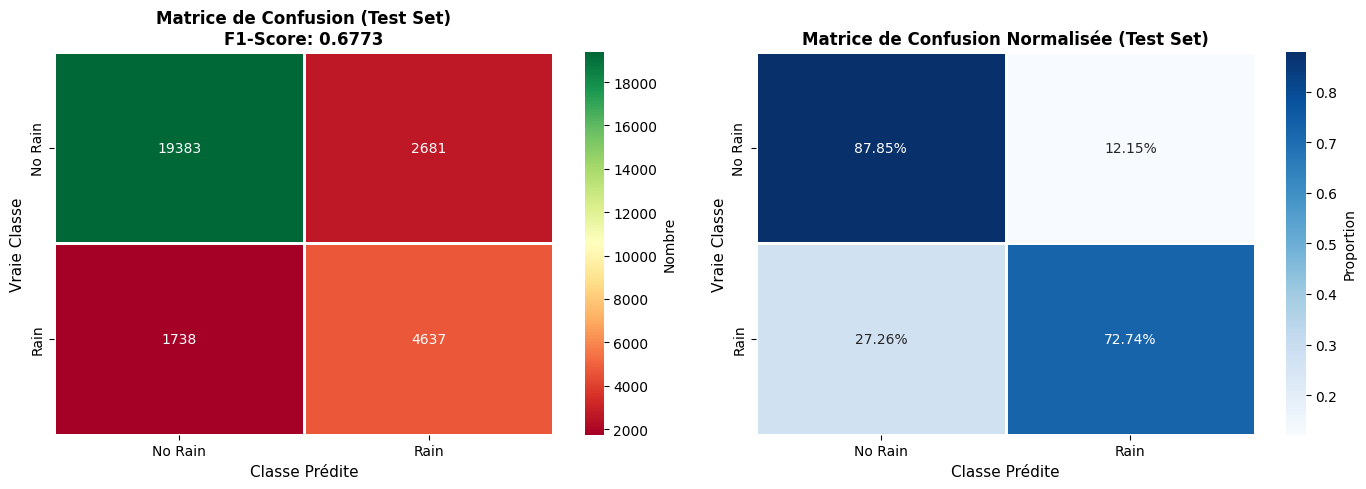

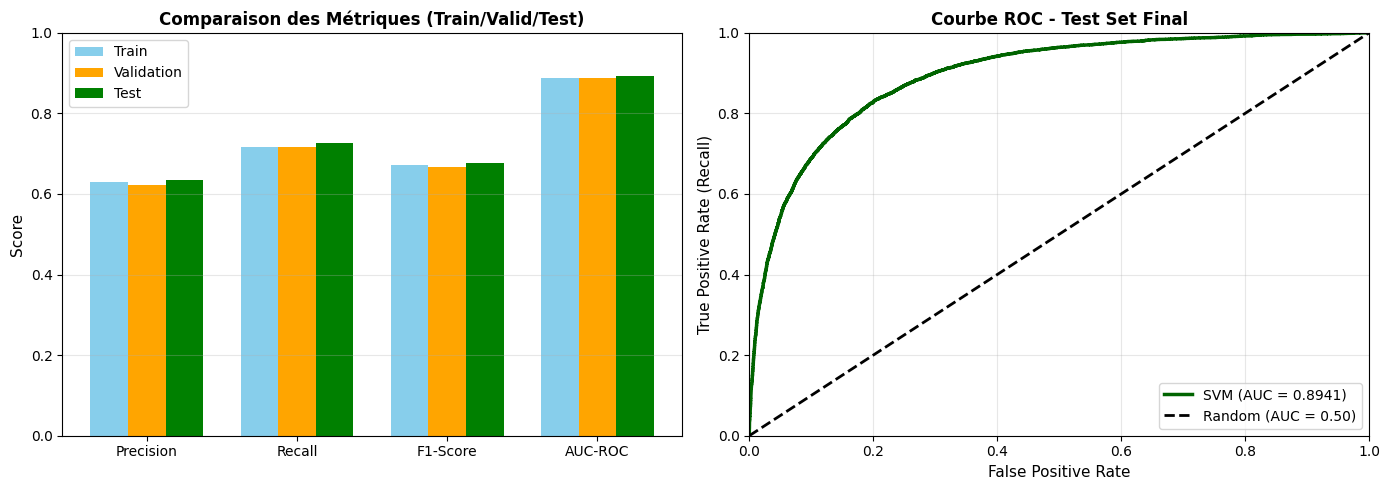

ANALYSE DES ERREURS

 STATISTIQUES DES ERREURS:
  • Nombre total d'erreurs: 4419 sur 28439
  • Taux d'erreur: 15.54%
  • Taux de succès: 84.46%

 TYPE D'ERREURS:
  • Faux Positifs (FP): 2681 (60.7% des erreurs)
     Le modèle prédit 'pluie' alors qu'il ne pleut pas
  • Faux Négatifs (FN): 1738 (39.3% des erreurs)
     Le modèle prédit 'pas de pluie' alors qu'il pleut

ÉVALUATION FINALE DU MODÈLE SVM:

   Performance sur Test Set:
   • F1-Score:  0.6773
   • Precision: 0.6336 → 63.4% des prédictions 'pluie' sont correctes
   • Recall:    0.7274 → 72.7% des pluies réelles sont détectées
   • AUC-ROC:   0.8941


['svm_weather_model_complete.pkl']

In [ ]:
print(f" Prédictions générées avec le seuil optimal: {best_threshold:.4f}")
print(f" Nombre de prédictions 'Rain': {y_pred_test.sum()}")
print(f" Nombre de prédictions 'No Rain': {(y_pred_test == 0).sum()}")
print()

print(" MÉTRIQUES DE PERFORMANCE FINALES")
# Calcul des métriques
accuracy_test = accuracy_score(y_test_binary, y_pred_test)
precision_test = precision_score(y_test_binary, y_pred_test)
recall_test = recall_score(y_test_binary, y_pred_test)
f1_test = f1_score(y_test_binary, y_pred_test)
auc_test = roc_auc_score(y_test_binary, y_scores_test)

print(f"\nPERFORMANCES FINALES SUR TEST SET:")
print(f"\n  • Accuracy:  {accuracy_test:.4f} ({accuracy_test*100:.2f}%)")
print(f"  • Precision: {precision_test:.4f} ({precision_test*100:.2f}%)")
print(f"  • Recall:    {recall_test:.4f} ({recall_test*100:.2f}%)")
print(f"  • F1-Score:  {f1_test:.4f} ({f1_test*100:.2f}%)")
print(f"  • AUC-ROC:   {auc_test:.4f}")

# Matrice de confusion
cm_test = confusion_matrix(y_test_binary, y_pred_test)
print(f"\n MATRICE DE CONFUSION:")
print(f"                    Prédit: No Rain  |  Prédit: Rain")
print(f"  Réel: No Rain          {cm_test[0,0]:5d}       |      {cm_test[0,1]:5d}")
print(f"  Réel: Rain             {cm_test[1,0]:5d}       |      {cm_test[1,1]:5d}")



print(" COMPARAISON COMPLÈTE DES PERFORMANCES")


# Créer un tableau de comparaison
comparison_data = {
    'Ensemble': ['Train', 'Validation', 'Test'],
    'Precision': [best_precision, prec_optimal, precision_test],
    'Recall': [best_recall, rec_optimal, recall_test],
    'F1-Score': [best_f1, f1_optimal, f1_test],
    'AUC-ROC': [roc_auc_score(weather_labels_binary, y_scores),
                auc_val, auc_test]
}

comparison_df = pd.DataFrame(comparison_data)

print(f"\n TABLEAU RÉCAPITULATIF COMPLET:")
print(f"\n{'Ensemble':<12} | Precision | Recall   | F1-Score | AUC-ROC")
print("-" * 65)
for idx, row in comparison_df.iterrows():
    print(f"{row['Ensemble']:<12} |   {row['Precision']:.4f}  | {row['Recall']:.4f}  |  {row['F1-Score']:.4f}  | {row['AUC-ROC']:.4f}")




print(" VISUALISATIONS FINALES")


# Figure 1: Matrice de confusion détaillée
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matrice de confusion avec valeurs absolues
sns.heatmap(cm_test, annot=True, fmt='d', cmap='RdYlGn',
            xticklabels=['No Rain', 'Rain'],
            yticklabels=['No Rain', 'Rain'],
            ax=axes[0], cbar_kws={'label': 'Nombre'}, linewidths=2)
axes[0].set_title(f'Matrice de Confusion (Test Set)\nF1-Score: {f1_test:.4f}',
                  fontweight='bold', fontsize=12)
axes[0].set_ylabel('Vraie Classe', fontsize=11)
axes[0].set_xlabel('Classe Prédite', fontsize=11)

# Matrice de confusion normalisée (pourcentages)
cm_normalized = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['No Rain', 'Rain'],
            yticklabels=['No Rain', 'Rain'],
            ax=axes[1], cbar_kws={'label': 'Proportion'}, linewidths=2)
axes[1].set_title('Matrice de Confusion Normalisée (Test Set)',
                  fontweight='bold', fontsize=12)
axes[1].set_ylabel('Vraie Classe', fontsize=11)
axes[1].set_xlabel('Classe Prédite', fontsize=11)

plt.tight_layout()
plt.show()

# Figure 2: Comparaison des métriques
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Barres comparatives
metrics = ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']
x = np.arange(len(metrics))
width = 0.25

train_values = [best_precision, best_recall, best_f1,
                roc_auc_score(weather_labels_binary, y_scores)]
valid_values = [prec_optimal, rec_optimal, f1_optimal, auc_val]
test_values = [precision_test, recall_test, f1_test, auc_test]

axes[0].bar(x - width, train_values, width, label='Train', color='skyblue')
axes[0].bar(x, valid_values, width, label='Validation', color='orange')
axes[0].bar(x + width, test_values, width, label='Test', color='green')

axes[0].set_ylabel('Score', fontsize=11)
axes[0].set_title('Comparaison des Métriques (Train/Valid/Test)',
                  fontweight='bold', fontsize=12)
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, 1])

# Graphique 2: Courbe ROC finale
fpr_test, tpr_test, _ = roc_curve(y_test_binary, y_scores_test)
axes[1].plot(fpr_test, tpr_test, linewidth=2.5,
             label=f'SVM (AUC = {auc_test:.4f})', color='darkgreen')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random (AUC = 0.50)')
axes[1].set_xlabel('False Positive Rate', fontsize=11)
axes[1].set_ylabel('True Positive Rate (Recall)', fontsize=11)
axes[1].set_title('Courbe ROC - Test Set Final', fontweight='bold', fontsize=12)
axes[1].legend(loc='lower right', fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim([0, 1])
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()



print("ANALYSE DES ERREURS")


# Identifier les erreurs
errors_idx = (y_test_binary != y_pred_test)
n_errors = errors_idx.sum()
error_rate = n_errors / len(y_test_binary)

print(f"\n STATISTIQUES DES ERREURS:")
print(f"  • Nombre total d'erreurs: {n_errors} sur {len(y_test_binary)}")
print(f"  • Taux d'erreur: {error_rate:.2%}")
print(f"  • Taux de succès: {(1-error_rate):.2%}")

print(f"\n TYPE D'ERREURS:")
print(f"  • Faux Positifs (FP): {fp} ({fp/n_errors*100:.1f}% des erreurs)")
print(f"     Le modèle prédit 'pluie' alors qu'il ne pleut pas")
print(f"  • Faux Négatifs (FN): {fn} ({fn/n_errors*100:.1f}% des erreurs)")
print(f"     Le modèle prédit 'pas de pluie' alors qu'il pleut")




print(f"\nÉVALUATION FINALE DU MODÈLE SVM:")
print(f"\n   Performance sur Test Set:")
print(f"   • F1-Score:  {f1_test:.4f}")
print(f"   • Precision: {precision_test:.4f} → {precision_test*100:.1f}% des prédictions 'pluie' sont correctes")
print(f"   • Recall:    {recall_test:.4f} → {recall_test*100:.1f}% des pluies réelles sont détectées")
print(f"   • AUC-ROC:   {auc_test:.4f}")



import joblib

# Sauvegarder le pipeline seul
joblib.dump(svm_pipeline, 'svm_weather_model.pkl')

# Sauvegarder le modèle + infos importantes
model_info = {
    'model': svm_pipeline,
    'threshold': float(best_threshold),
    'test_f1': float(f1_test),
    'test_auc': float(auc_test)
}

joblib.dump(model_info, 'svm_weather_model_complete.pkl')

